In [ ]:
from langgraph.graph import StateGraph, START, END
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from typing import TypedDict
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnableSequence, RunnableParallel, RunnablePassthrough
from langchain_core.output_parsers import PydanticOutputParser, StrOutputParser


In [9]:
load_dotenv()
llm = ChatGroq(
    model=os.getenv("model"),
    api_key=os.getenv("api_key")
)

In [10]:
class BlogState(TypedDict):
    title: str
    outline : str
    final_blog : str 

In [11]:
def blogOutline(state : BlogState) ->BlogState:
    title = state['title']
    prompt = f"Create a good detailed high-level blog outline for the blog title : {title}"
    state['outline'] = llm.invoke(prompt).content
    return state 

def blogGenerated(state: BlogState) -> BlogState:
    outline = state["outline"]
    title = state['title']
    prompt = f"Create me a blog on the title {title} and outline {outline}"
    state['final_blog'] = llm.invoke(prompt).content
    return state

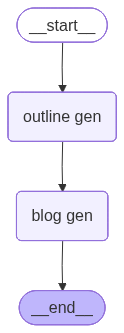

In [12]:
graph = StateGraph(BlogState)

graph.add_node("outline gen", blogOutline)
graph.add_node("blog gen", blogGenerated)

graph.add_edge(START, "outline gen")
graph.add_edge("outline gen", "blog gen")
graph.add_edge("blog gen", END)

workflow= graph.compile()
workflow

In [16]:
print(workflow.invoke({"title" : "Current hot news about internatioanl war and politics"})["final_blog"])

# **Current Hot News About International War & Politics**  

*Your quick‑read guide to the most volatile conflicts and geopolitical shifts shaping 2026, with context, analysis, and links for deeper digging.*

---

## 1. Introduction  

**Hook:** 2026 feels like the world’s “tipping point.” The **New START treaty** that has restrained U.S.–Russia nuclear arsenals for two decades expires in February, **China’s massive Taiwan‑Strait drills** have roiled the Indo‑Pacific, and a cascade of flashpoints—from a **potential Lebanon‑Israel war** to a **new Sahel jihadist surge**—are testing the limits of diplomacy and the resilience of global supply chains.  

**Scope & Methodology:** This post surveys the **big‑picture great‑power competition**, the **most consequential wars still raging**, and the **emerging flashpoints** that could flare into larger crises. All facts are drawn from reputable outlets (CFR, Al Jazeera, Reuters, AP, International Crisis Group, Chatham House) and up‑to‑date open‑

In [ ]:
# # doing the smae thing using langChain runnables

# ContentParser = StrOutputParser()
# outline_template = PromptTemplate(template="Given the name of blog, generate me a detailed pipeline for my blog of title : {title}", input_variables=["title"])
# blog_template = PromptTemplate(template="Generate me a blog based on theoutline: {outline}", input_variables=["outline"])

# chain